<h1 style="text-align:center;color:teal;font-family:calibri;font-size:250%">CREDIT EDA ASSIGNMENT</h1>

### Import libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

### Read Application CSV

In [3]:
app_data = pd.read_csv("application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Data Inspection on Application dataset

#### Get info and shape on the dataset

In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_data.shape

(307511, 122)

### Data quality Check

#### Check for Percentage null values in Application dataset

In [6]:
pd.set_option('display.max_rows', 200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Conclusion >> Columns with null values more than 47 percent may give wrong insights, hence dropping them 

#### Dropping Columns with missing values greater than 47

In [7]:
Percentage = 47
threshold = int(((100-Percentage)/100)*app_data.shape[0] + 1)
app_df = app_data.dropna(axis=1, how='any', thresh=threshold)
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Validate the dataset for dropped columns

In [8]:
app_df.shape

(307511, 73)

#### Check the percentage of null values

In [9]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Impute Missing values

#### Check the missing values in Application dataset before imputing values

In [10]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### OCCUPATION_TYPE Column has 31% missing values, since its a categorical column , imputing the missing values with a unknown or others value

In [11]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

31.345545362604916

In [12]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [13]:
app_df.OCCUPATION_TYPE.fillna("Others",inplace=True)

In [14]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [15]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

#### EXT_SOURCE_3 Column has 19% missing values

In [16]:
app_df.EXT_SOURCE_3.isnull().mean()*100

19.825307062186393

In [17]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [18]:
print(app_df.EXT_SOURCE_3.describe())

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


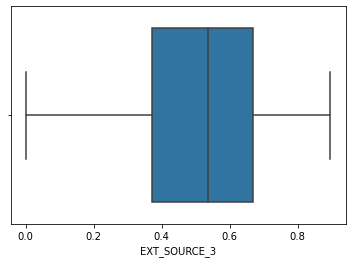

In [19]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

#### Conclusion >>  since its a numerical column with no outliers and there is not much difference between mean and median, hence we can impute with mean or median

In [20]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True)

In [21]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [22]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: EXT_SOURCE_3, Length: 814, dtype: float64

#### Get the list of columns with null values less than 13%

In [23]:
null_Cols = list(app_df.columns[app_df.isna().any()])
len(null_Cols)

16

In [24]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### Handling Missing values in Columns with 13% null values

In [25]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [26]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

#### Conclusion >> We could see that 99% of values or mode in the columns AMT_REQ_CREDIT_BUREAU_HOUR , AMT_REQ_CREDIT_BUREAU_DAY , AMT_REQ_CREDIT_BUREAU_WEEK ,AMT_REQ_CREDIT_BUREAU_MON , AMT_REQ_CREDIT_BUREAU_QRT  , AMT_REQ_CREDIT_BUREAU_YEAR is 0.0, hence imputing these columns with the mode

In [27]:
Cols = ["AMT_REQ_CREDIT_BUREAU_HOUR" , "AMT_REQ_CREDIT_BUREAU_DAY" , "AMT_REQ_CREDIT_BUREAU_WEEK" ,"AMT_REQ_CREDIT_BUREAU_MON" , "AMT_REQ_CREDIT_BUREAU_QRT"  , "AMT_REQ_CREDIT_BUREAU_YEAR"]

In [28]:
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace=True)  

#### Validate if the data is imputed correctly

In [29]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True)*100

0.0      83.553434
1.0      11.011639
2.0       4.686662
3.0       0.558354
4.0       0.154791
5.0       0.020812
6.0       0.009105
8.0       0.002276
7.0       0.002276
261.0     0.000325
19.0      0.000325
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [30]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


#### Handling Missing values less than 1%

In [31]:
null_Cols = list(app_df.columns[app_df.isna().any()])
len(null_Cols)

10

In [32]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [33]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [34]:
app_df.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.726386
1.0      15.945055
2.0       9.711899
3.0       6.595647
4.0       4.550230
5.0       3.087540
6.0       2.071519
7.0       1.417338
8.0       0.941629
9.0       0.639173
10.0      0.435577
11.0      0.273092
12.0      0.202290
13.0      0.130836
14.0      0.077653
15.0      0.054162
16.0      0.044700
17.0      0.023818
18.0      0.015987
19.0      0.014356
20.0      0.009788
21.0      0.009136
22.0      0.006525
23.0      0.004242
24.0      0.003915
25.0      0.003589
27.0      0.001631
29.0      0.000653
28.0      0.000326
47.0      0.000326
344.0     0.000326
30.0      0.000326
26.0      0.000326
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### Conclusion >> For categorical columns, imputing the missing values with mode, and for numerical columns imputing missing values with median

#### Convert Negative values to Positive in Days variables so that median is not affected

In [35]:
app_df.DAYS_BIRTH = app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED = app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

#### Imputing Categorical Columns

In [36]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [37]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0],inplace=True)

#### Imputing Numerical Columns

In [38]:
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(),inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(),inplace=True)
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(),inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [39]:
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(),inplace=True)

#### Validate if any null values present in dataset

In [40]:
null_Cols = list(app_df.columns[app_df.isna().any()])
len(null_Cols)

0

In [41]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

### Check / Validate the data types of the columns

In [42]:
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### Binning of continuous variables

#### Standardizing Days Columns in Years for easy binning

In [43]:
app_df["YEARS_BIRTH"] = app_df.DAYS_BIRTH.apply(lambda x: int(x//365))

In [44]:
app_df["YEARS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply(lambda x: int(x//365))
app_df["YEARS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply(lambda x: int(x//365))
app_df["YEARS_ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply(lambda x: int(x//365))
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: int(x//365))

#### Binning AMT_CREDIT Column

In [45]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: AMT_CREDIT, Length: 5603, dtype: float64

In [46]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [47]:
app_df["AMT_CREDIT_Category"] = pd.cut(app_df.AMT_CREDIT,[0,200000,400000,600000,800000,10000000],labels=["Very-low Credit","Low Credit","Medium Credit","High Credit","Very-high Credit"])

In [48]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True)*100

Low Credit          26.389625
Very-high Credit    26.244264
Medium Credit       21.550449
High Credit         14.061936
Very-low Credit     11.753726
Name: AMT_CREDIT_Category, dtype: float64

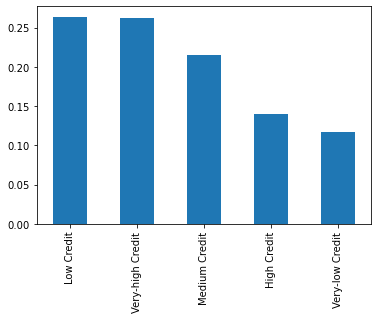

In [49]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

#### Conclusion >> The Credit amount of the loan for most applicants is either low(200000 to 400000) or Very High(above 800000)

#### Binning YEARS_BIRTH Column

In [50]:
app_df["AGE_CATEGORY"] = pd.cut(app_df.YEARS_BIRTH,[0,25,45,65,85],labels=["Below 25","25-45","45-65","65-85"])

In [51]:
app_df["AGE_CATEGORY"].value_counts(normalize=True)*100

25-45       51.901233
45-65       41.163406
Below 25     5.306477
65-85        1.628885
Name: AGE_CATEGORY, dtype: float64

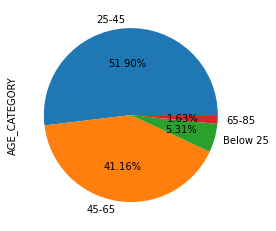

In [52]:
app_df["AGE_CATEGORY"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.show()

#### Conclusion >> Most of the Applicants are between 25-45 age group

### Data Imbalance check

In [53]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_Category,AGE_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9,5,3,Medium Credit,Below 25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3,0,2,Very-high Credit,25-45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,11,6,2,Very-low Credit,45-65
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,8,26,6,1,Low Credit,45-65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8,11,9,3,Medium Credit,45-65


#### Dividing Application Dataset with Target Variable as 0 and 1

In [54]:
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [55]:
app_data.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

#### Conclusion >> 1 out of Every 9 percent of applicants are defaulters

### Univarient Analysis

In [56]:
cat_cols = list(app_df.columns[app_df.dtypes== np.object])
num_cols = list(app_df.columns[app_df.dtypes== np.int64]) + list(app_df.columns[app_df.dtypes== np.float64])

In [57]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [58]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

### Plot on Categorical columns

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


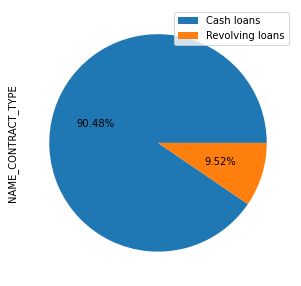

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


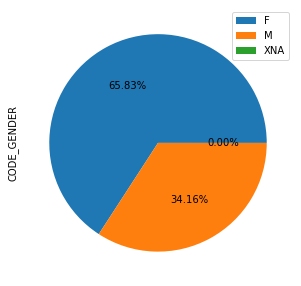

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


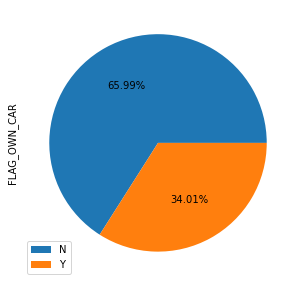

Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


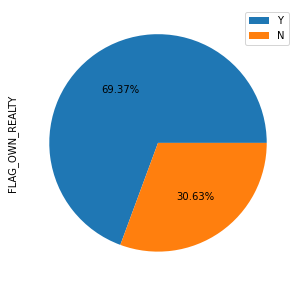

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64


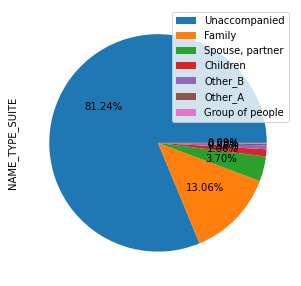

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


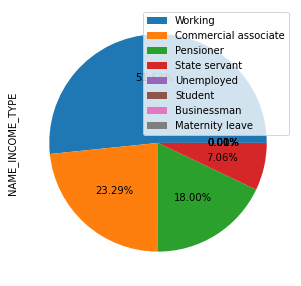

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


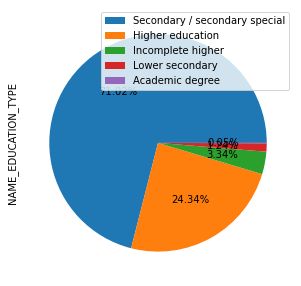

Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


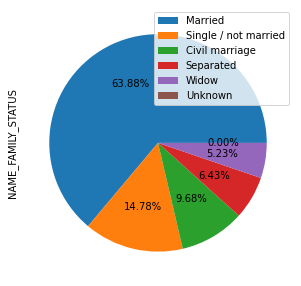

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


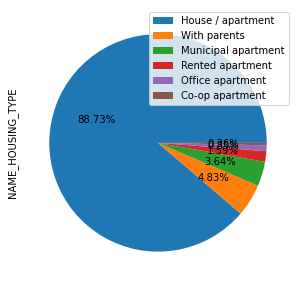

Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


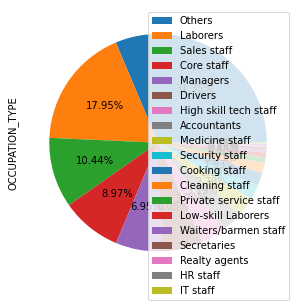

TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


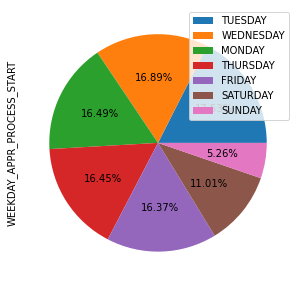

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

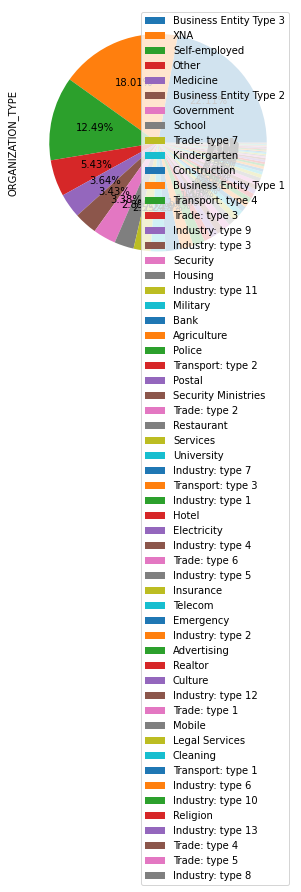

In [59]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()   

#### Conclusion >> Insights on below columns

1. NAME_CONTRACT_TYPE - More application have Cash loans than Revolving loans
2. CODE_GENDER - Number of Female applicants are twice than that of male applicants
3. FLAG_OWN_CAR - Most(70%) of the applicants do not own a car
4. FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house
5. NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied
6. NAME_INCOME_TYPE - Most(51%) of the applicants are earning their income from Work
7. NAME_EDUCATION_TYPE - 71% of the applicants have completed Secondary / secondary special education
8. NAME_FAMILY_STATUS - 63% of the applicants are married
9. NAME_HOUSING_TYPE - 88% of the housing type of applicants are House/apartment
10. OCCUPATION_TYPE - Most(31%) of the applicants have other Occupation type
11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have applied the loan on Tuseday
12. ORGANIZATION_TYPE - Most of the Organization type of employees are Business Entity Type 3

### Plot on Numerical columns

#### Categorizing columns with and without flags

In [60]:
num_cols_wf = []
num_cols_withflag = []
for i in num_cols:
    if i.startswith("FLAG"):
        num_cols_withflag.append(i)
    else:
        num_cols_wf.append(i)
num_cols_wf

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

99th Percentile 452712.9
count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


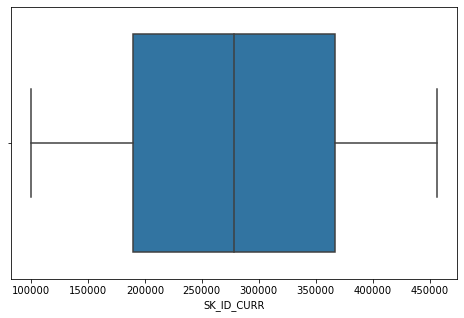

----------------------
99th Percentile 1.0
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


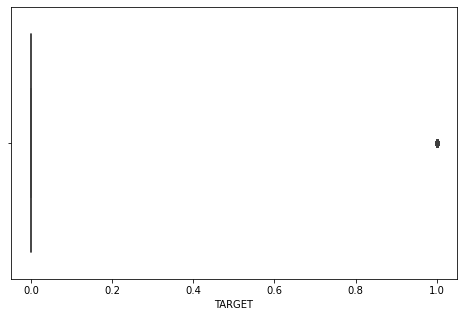

----------------------
99th Percentile 3.0
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


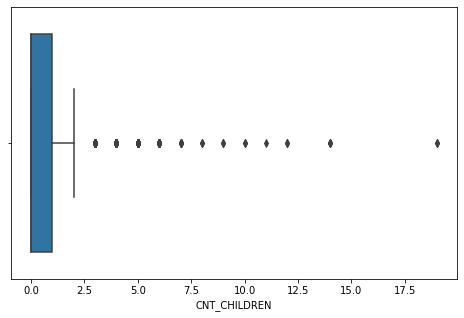

----------------------
99th Percentile 24419.0
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


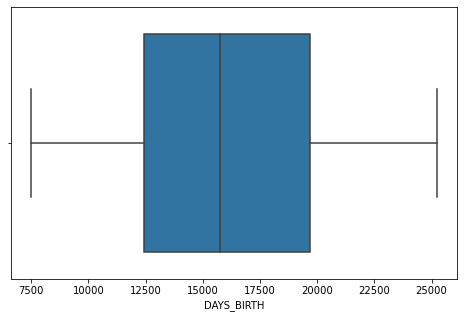

----------------------
99th Percentile 365243.0
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


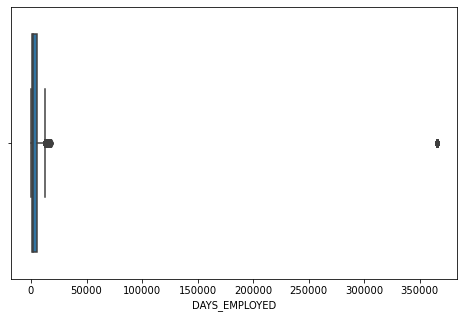

----------------------
99th Percentile 5447.0
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


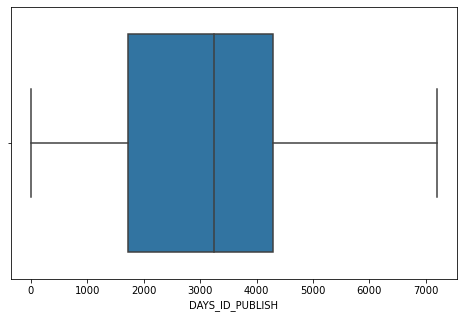

----------------------
99th Percentile 3.0
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


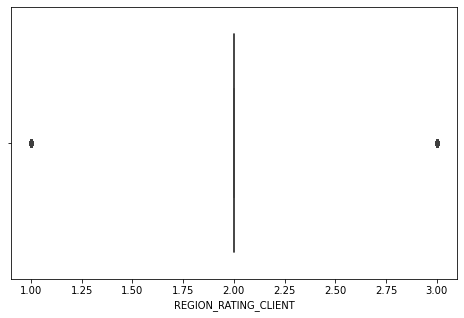

----------------------
99th Percentile 3.0
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


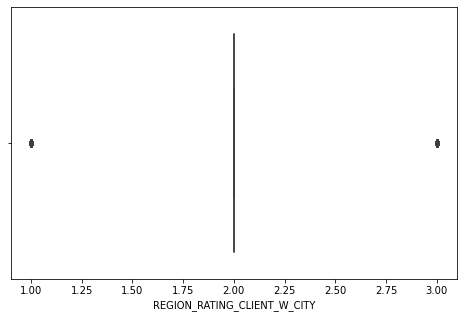

----------------------
99th Percentile 19.0
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


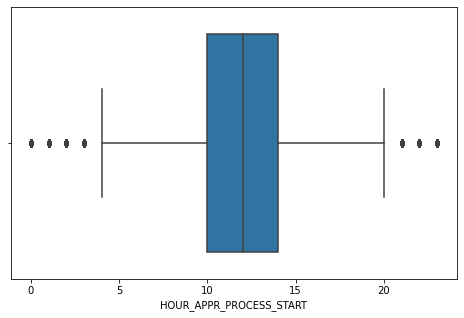

----------------------
99th Percentile 1.0
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


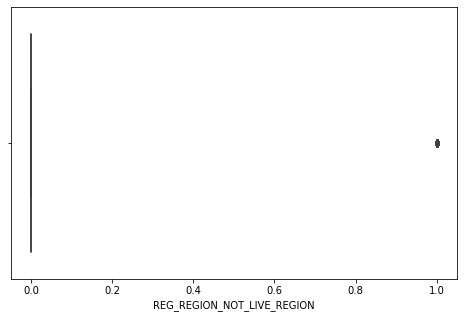

----------------------
99th Percentile 1.0
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


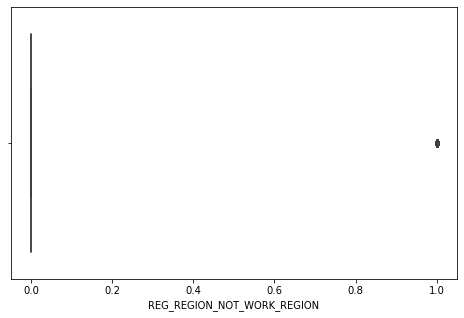

----------------------
99th Percentile 1.0
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


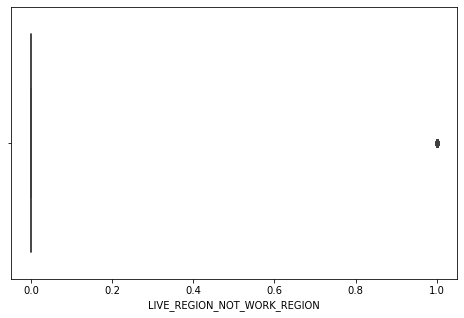

----------------------
99th Percentile 1.0
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


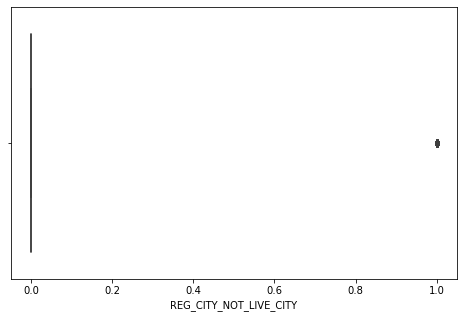

----------------------
99th Percentile 1.0
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


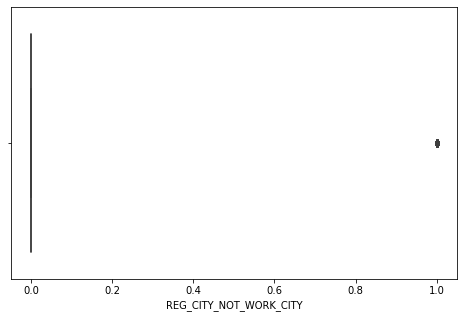

----------------------
99th Percentile 1.0
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


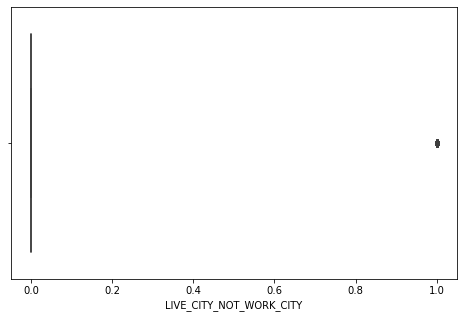

----------------------
99th Percentile 66.0
count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


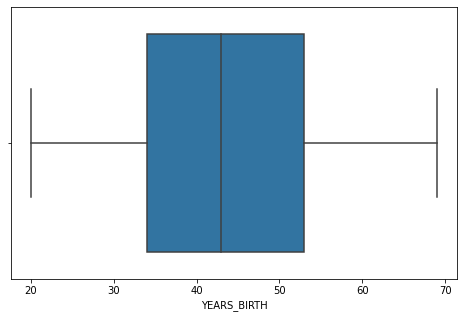

----------------------
99th Percentile 1000.0
count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


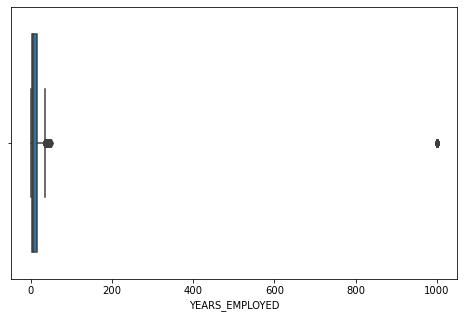

----------------------
99th Percentile 38.0
count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


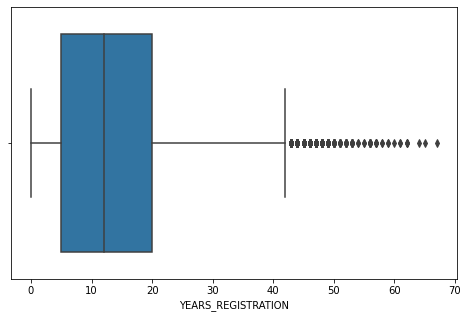

----------------------
99th Percentile 14.0
count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


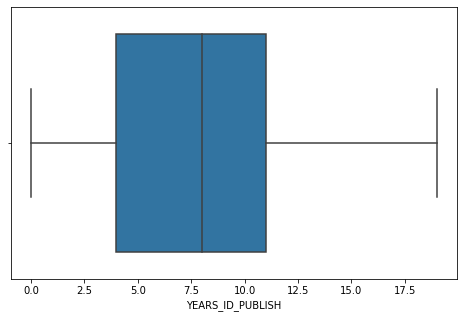

----------------------
99th Percentile 8.0
count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


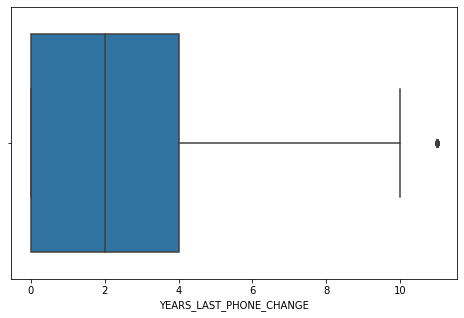

----------------------
99th Percentile 472500.0
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


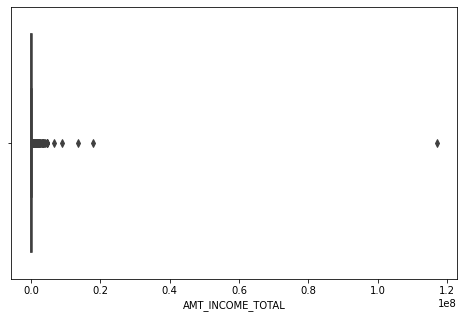

----------------------
99th Percentile 1854000.0
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


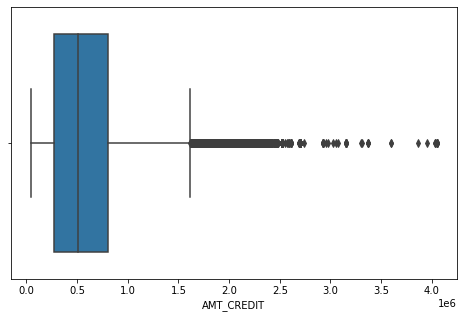

----------------------
99th Percentile 70006.5
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


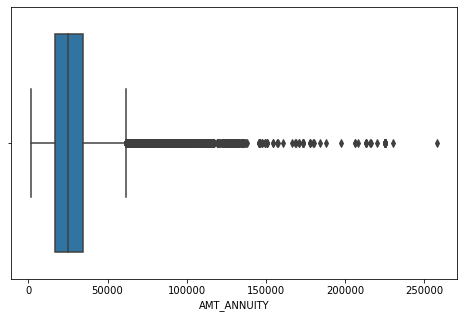

----------------------
99th Percentile 1800000.0
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


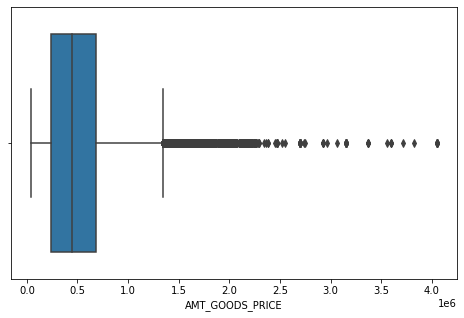

----------------------
99th Percentile 0.072508
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


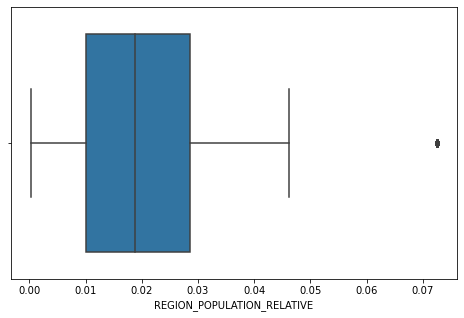

----------------------
99th Percentile 13879.0
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


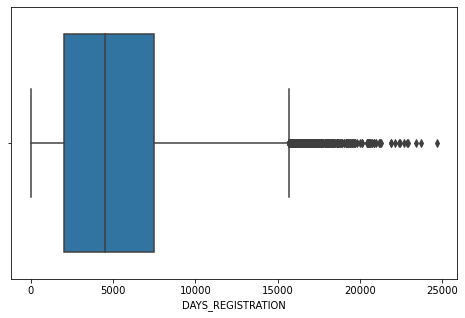

----------------------
99th Percentile 5.0
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


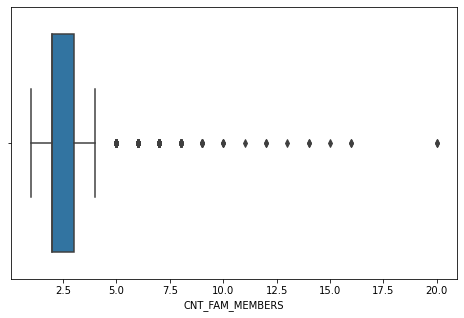

----------------------
99th Percentile 0.782766420255892
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


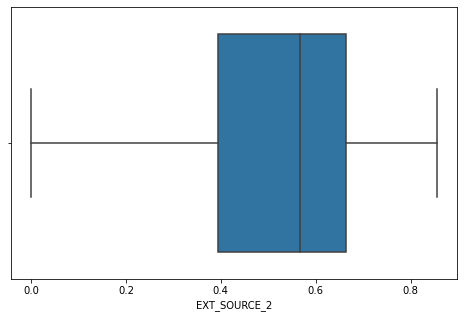

----------------------
99th Percentile 0.8327850252992314
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


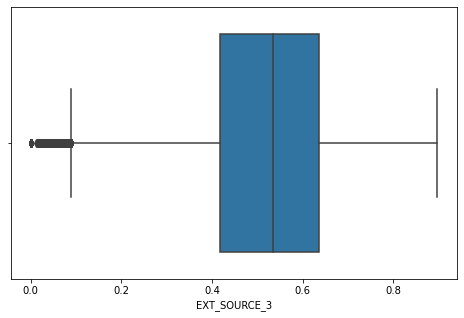

----------------------
99th Percentile 10.0
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


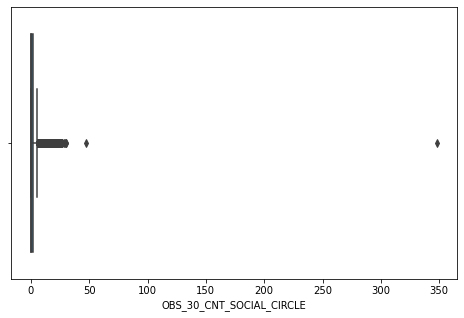

----------------------
99th Percentile 2.0
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


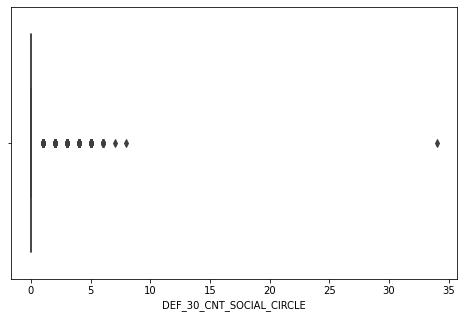

----------------------
99th Percentile 10.0
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


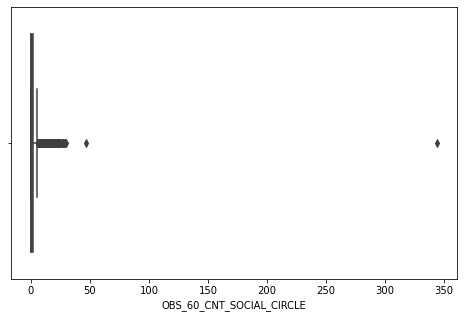

----------------------
99th Percentile 2.0
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


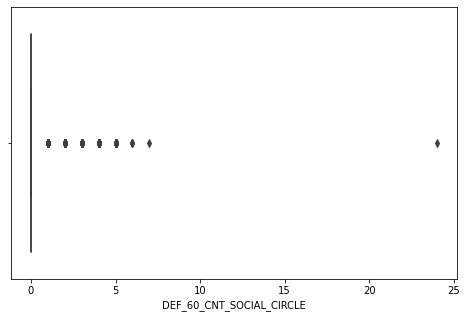

----------------------
99th Percentile 3149.0
count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


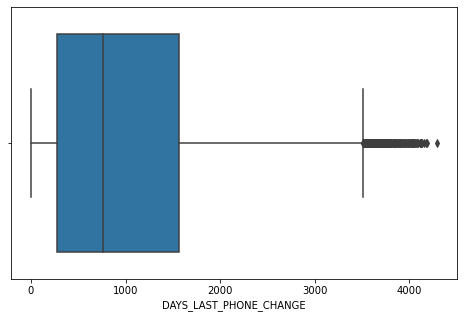

----------------------
99th Percentile 0.0
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


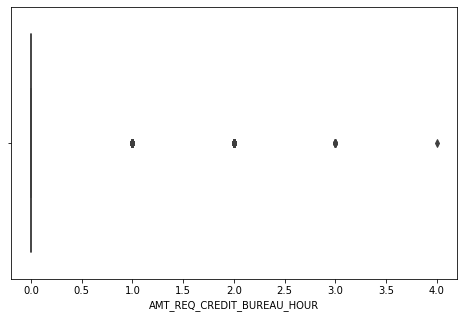

----------------------
99th Percentile 0.0
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


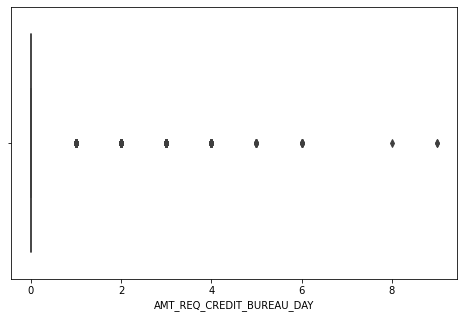

----------------------
99th Percentile 1.0
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


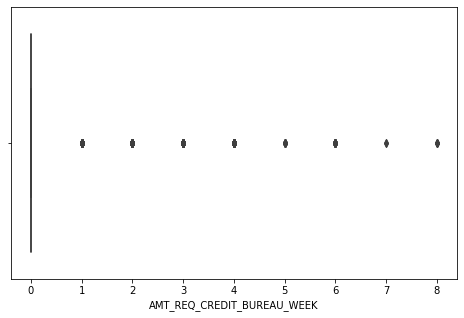

----------------------
99th Percentile 4.0
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


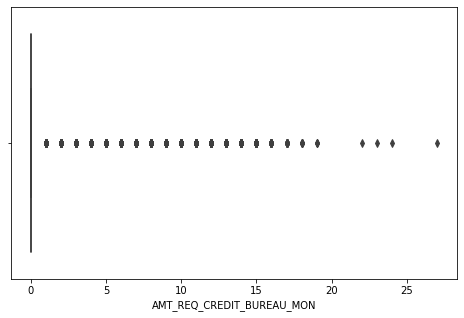

----------------------
99th Percentile 2.0
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


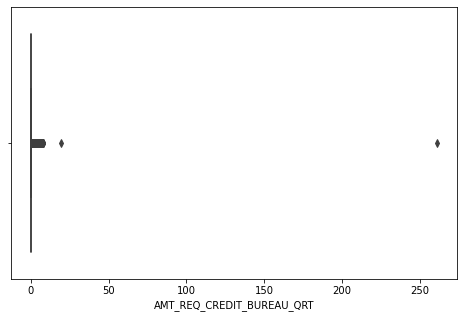

----------------------
99th Percentile 8.0
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


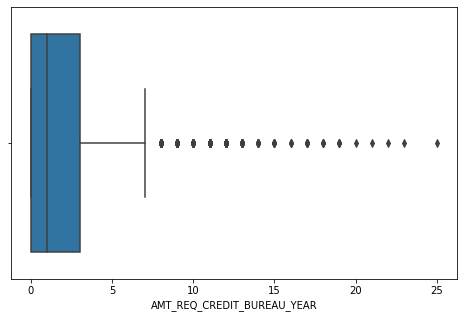

----------------------


In [61]:
for col in num_cols_wf:
    print("99th Percentile",np.percentile(app_df[col],99))
    print(app_df[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=app_df,x=col)
    plt.show()
    print("----------------------")

#### Conclusion >> Few Columns are with outliers are below

1. AMT_INCOME_TOTAL Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
2. AMT_CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
3. AMT_ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers
4. AMT_GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers
5. REGION_POPULATION_RELATIVE Column has a one outliers and there not much difference between mean and median

### Univarient Analysis on Columns with Target 0 and 1

Plot on NAME_CONTRACT_TYPE for Target 0 and 1


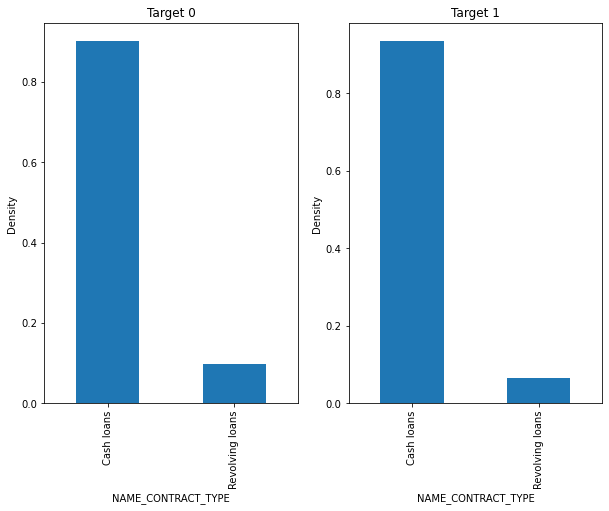

-----------------------------------------
Plot on CODE_GENDER for Target 0 and 1


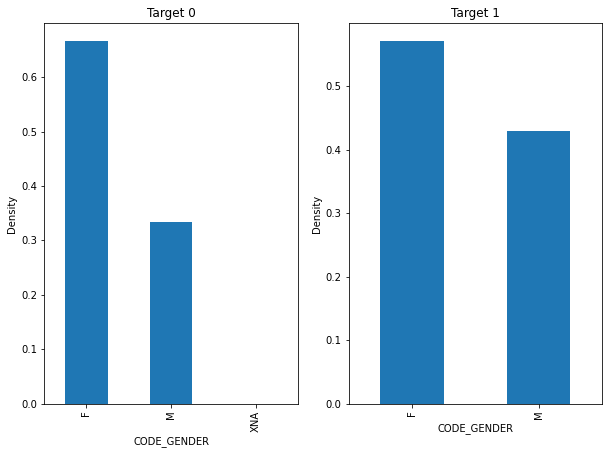

-----------------------------------------
Plot on FLAG_OWN_CAR for Target 0 and 1


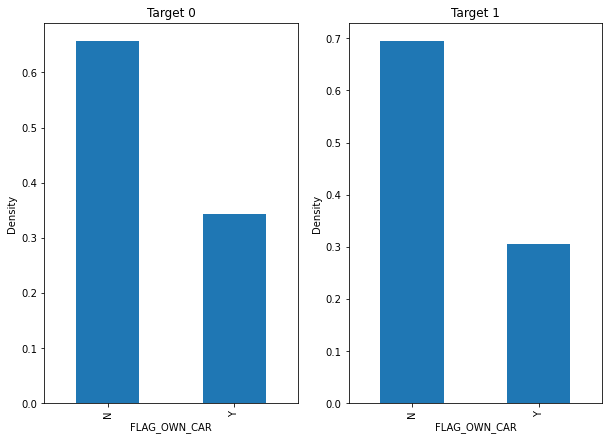

-----------------------------------------
Plot on FLAG_OWN_REALTY for Target 0 and 1


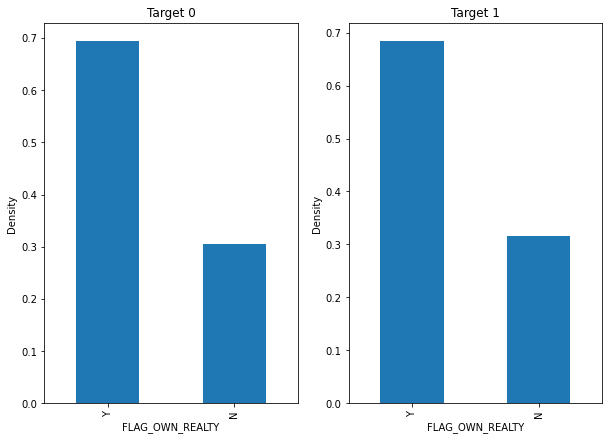

-----------------------------------------
Plot on NAME_TYPE_SUITE for Target 0 and 1


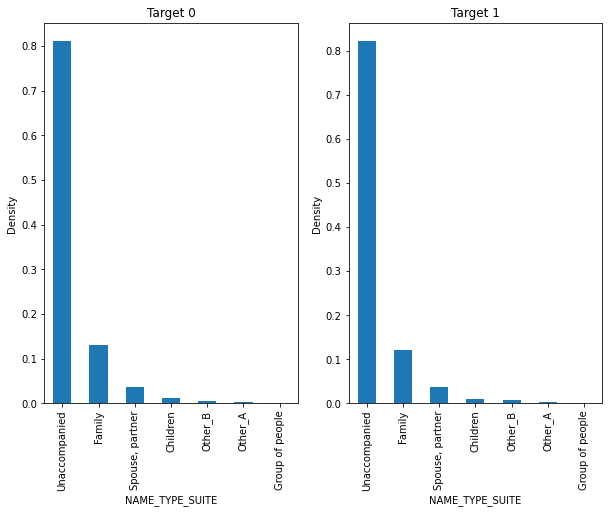

-----------------------------------------
Plot on NAME_INCOME_TYPE for Target 0 and 1


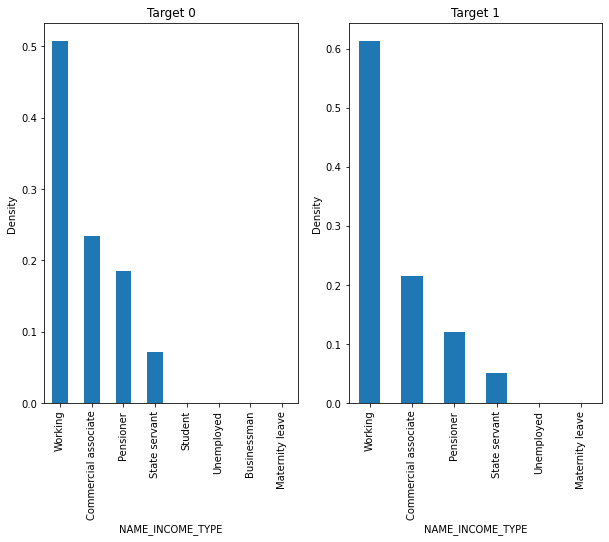

-----------------------------------------
Plot on NAME_EDUCATION_TYPE for Target 0 and 1


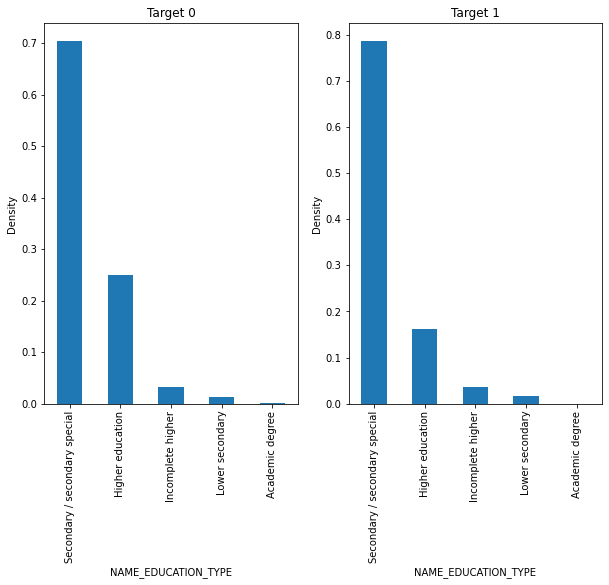

-----------------------------------------
Plot on NAME_FAMILY_STATUS for Target 0 and 1


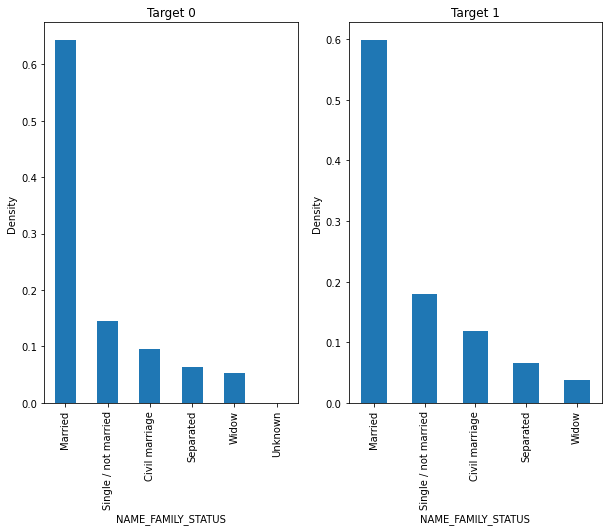

-----------------------------------------
Plot on NAME_HOUSING_TYPE for Target 0 and 1


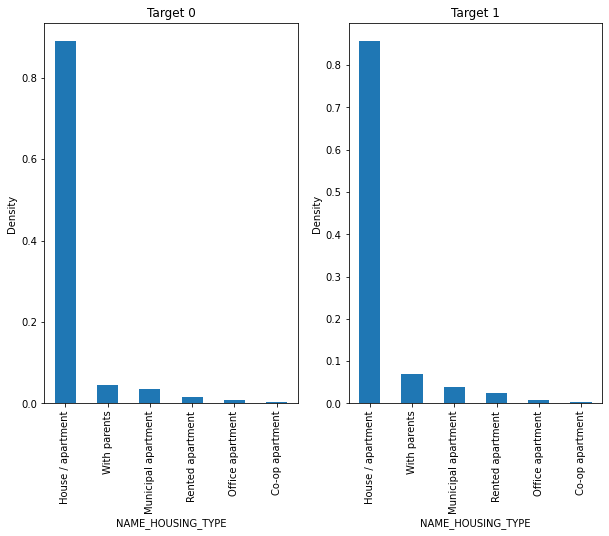

-----------------------------------------
Plot on OCCUPATION_TYPE for Target 0 and 1


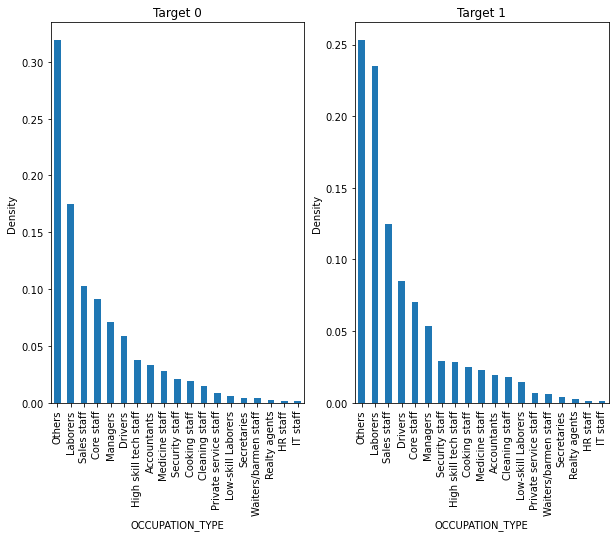

-----------------------------------------
Plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


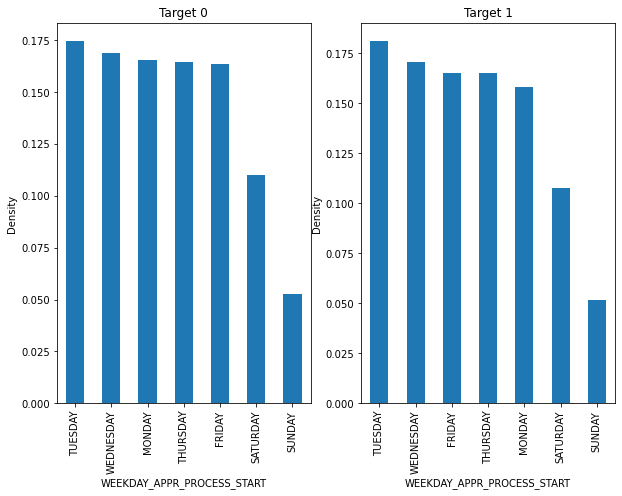

-----------------------------------------
Plot on ORGANIZATION_TYPE for Target 0 and 1


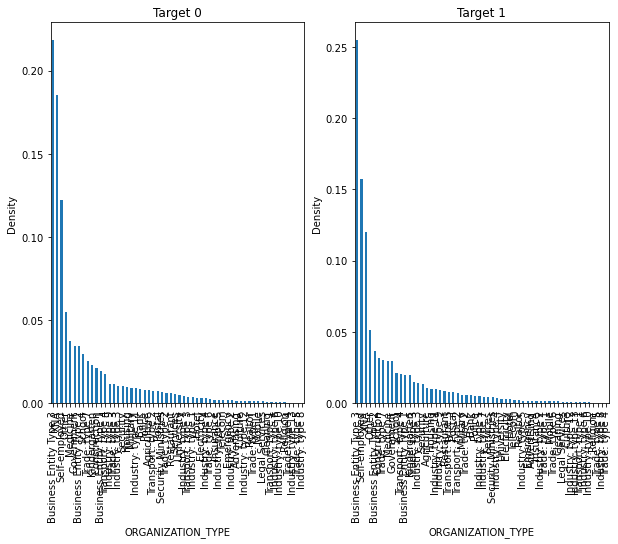

-----------------------------------------


In [62]:
for col in cat_cols:
    print(f"Plot on {col} for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("-----------------------------------------")

#### Conclusion >> Below are the column insights

1. NAME_CONTRACT TYPE- The Applicants are receiving more of Cash loans than Revolving loans both for Target 0 and 1
2. CODE_GENDER - Number of Female applicants are twice than that of male applicants both for Target 0 and 1
3. FLAG_OWN_CAR - Most(70%) of the applicants do not own a car both for Target 0 and 1
4. FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house both for Target 0 and 1
5. NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied both for Target 0 and 1
6. NAME_INCOME_TYPE - For both Target 0 and 1, Most(51%) of the applicants are earning their income from Work
7. NAME_EDUCATION_TYPE - For both Target 0 and 1, almost 71% of the applicants have completed Secondary / secondary special education
8. NAME_FAMILY_STATUS - 63% of the applicants are married for both Target 0 and 1
9. NAME_HOUSING_TYPE - 88% of the housing type of applicants are House/apartment for both Target 0 and 1
10. OCCUPATION_TYPE - Most(31%) of the applicants have other Occupation type, are non defaulters and Laborere,Sales staff,Drivers and core staff are not able to repay the loan on time
11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have applied the loan on Tuseday and the least on Sunday
12. ORGANIZATION_TYPE - Most of the Applicants are working in Business Entity Type 3, Self Employed and other Organization type

#### Analysis on AMT_GOODS_PRICE on Target 0 and 1

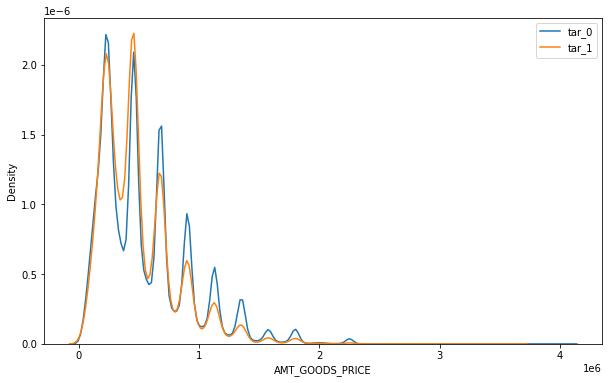

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'],label='tar_0',hist=False)
sns.distplot(tar_1['AMT_GOODS_PRICE'],label='tar_1',hist=False)
plt.legend()
plt.show()

#### Conclusion >> The price of the goods for which the loan is given has the same variation for Target 0 and 1

### Bivarient & Multivarient Analysis

#### Bivarient Analysis between WEEKDAY_APPR_PROCESS_START VS HOUR_APPR_PROCESS_START

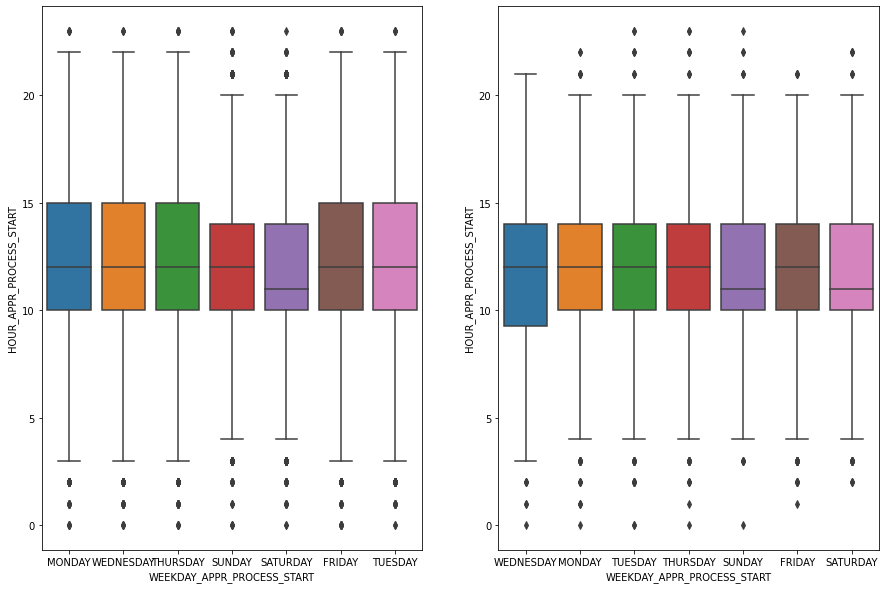

In [64]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y='HOUR_APPR_PROCESS_START',data=tar_0)

plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y='HOUR_APPR_PROCESS_START',data=tar_1)
plt.show()

#### Conclusion >> 

1. The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm.
2. We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for Saturday where the time is between 10am to 11am for both Target 0 and 1
3. The loan defaulters have applied for the loan between 9:30am-10am and 2pm where as the applicants who repay the loan on time have applied for the loan between 10am to 3pm

#### Bivarient Analysis between AGE_CATEGORY VS AMT_CREDIT

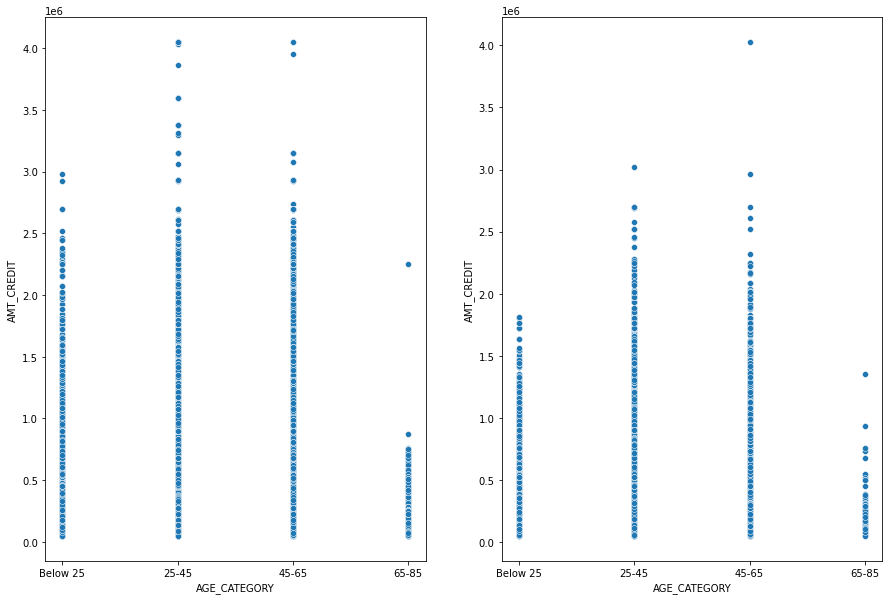

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.scatterplot(x='AGE_CATEGORY',y='AMT_CREDIT',data=tar_0)
plt.subplot(1,2,2)
sns.scatterplot(x='AGE_CATEGORY',y='AMT_CREDIT',data=tar_1)
plt.show()

#### Conclusion >>

1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan properly
2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters
3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age


#### Pair plot of Amount Columns for Target 0

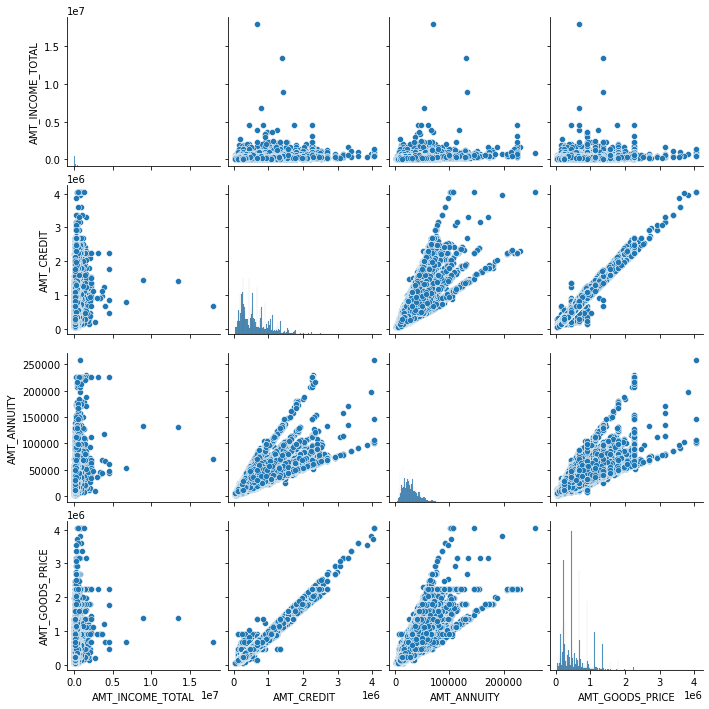

In [66]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

#### Conclusion >> For Applicants who are able to replay the loan on time

1. AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT_ANNUITY
2. AMT_ANNUITY Increases with Increases in AMT_GOODS_PRICE and AMT_Credit
3. AMT_GOODS_PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY
4. AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
 

#### Pair plot of Amount Columns for Target 1

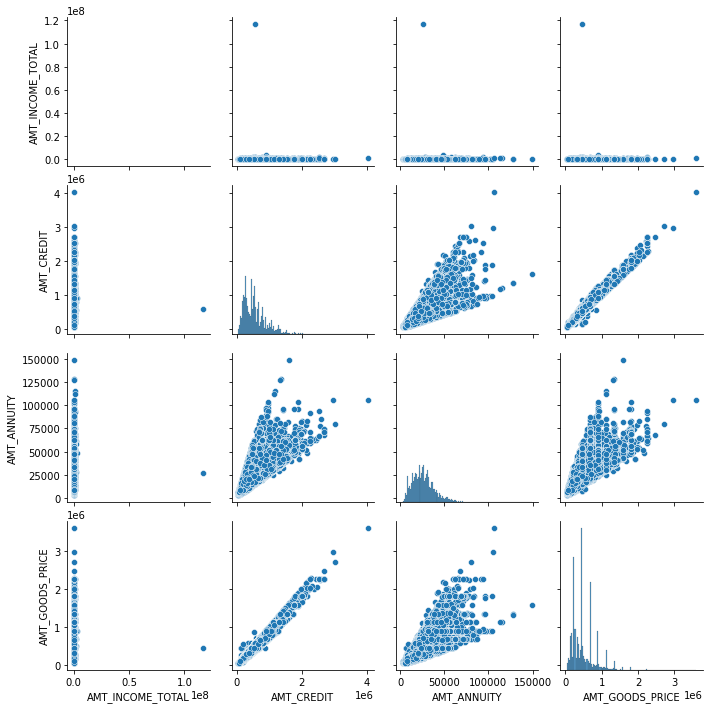

In [67]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

#### Conclusion >> For Applicants who are unable to replay the loan on time

1. AMT_CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT_ANNUITY
2. AMT_ANNUITY Increases with Increases in AMT_GOODS_PRICE and AMT_Credit
3. AMT_GOODS_PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY
4. AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE

### Co-relation between Numerical Columns

In [68]:
corr_data = app_df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,25,1,9,5,3
1,270000.0,1293502.5,35698.5,1129500.0,45,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,52,0,11,6,2
3,135000.0,312682.5,29686.5,297000.0,52,8,26,6,1
4,121500.0,513000.0,21865.5,513000.0,54,8,11,9,3


In [69]:
corr_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632,-0.027226,-0.063836,-0.027783,-0.008648,0.018592
AMT_CREDIT,0.156870,1.000000,0.770127,0.986734,0.055408,-0.064319,-0.009521,0.006831,0.077057
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774837,-0.009453,-0.102853,-0.038375,-0.011100,0.064893
AMT_GOODS_PRICE,0.159632,0.986734,0.774837,1.000000,0.053484,-0.062191,-0.011456,0.009571,0.079095
YEARS_BIRTH,-0.027226,0.055408,-0.009453,0.053484,1.000000,0.623879,0.331704,0.271453,0.086527
YEARS_EMPLOYED,-0.063836,-0.064319,-0.102853,-0.062191,0.623879,1.000000,0.214592,0.274460,-0.016393
YEARS_REGISTRATION,-0.027783,-0.009521,-0.038375,-0.011456,0.331704,0.214592,1.000000,0.101373,0.058831
YEARS_ID_PUBLISH,-0.008648,0.006831,-0.011100,0.009571,0.271453,0.274460,0.101373,1.000000,0.093213
YEARS_LAST_PHONE_CHANGE,0.018592,0.077057,0.064893,0.079095,0.086527,-0.016393,0.058831,0.093213,1.000000


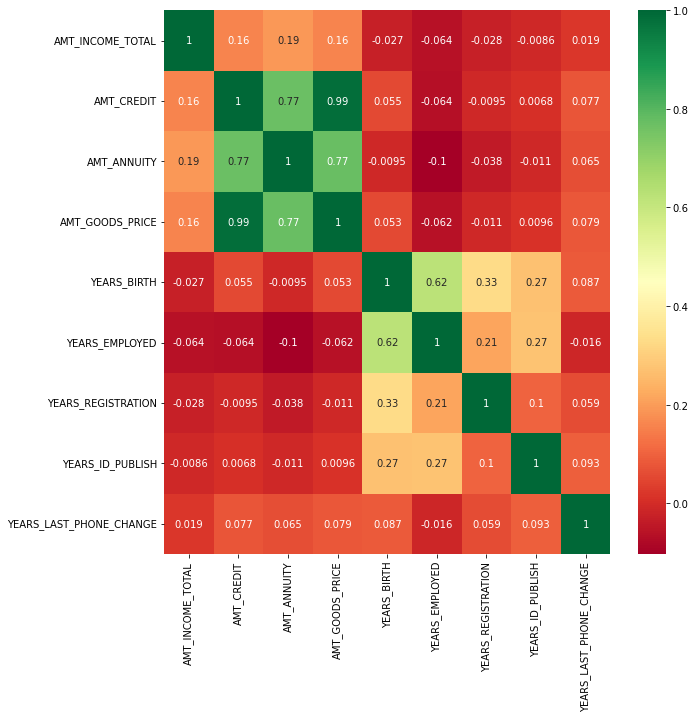

In [70]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

#### Conclusion >>

1. AMT_INCOME_TOTAL - It has a positive corelation index of 0.16,0.19,0.16 with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively.
2. AMT_CREDIT - Is has negative coreltaion index of 0.064 with YEARS_EMPLOYED and positive coreltaion index of 0.99,0.77 with AMT_GOODS_PRICE, AMT_ANNUITY respectively.
3. AMT_ANNUITY - Is has negative coreltaion index of 0.1 with YEARS_EMPLOYED and positive coreltaion index of 0.77 with AMT_CREDIT
4. AMT_GOODS_PRICE - It has a positive corelation with AMT_CREDIT,AMT_ANNUITY
5. YEARS_BIRTH - It has a positive corelation with YEARS_EMPLOYED, AMT_GOODS_PRICE and negative coreltaion with AMT_ANNUITY,AMT_INCOME_TOTAL
6. YEARS_EMPLOYED - Is has negative coreltaion index of 0.1 with AMT_ANNUITY and has a positive corelation with YEARS_REGISTRATION, YEARS_ID_PUBLISH
7. YEARS_REGISTRATION - It has a positive corelation with YEARS_ID_PUBLISH, YEARS_BIRTH, YEARS_EMPLOYED
8. YEARS_ID_PUBLISH - It has a positive corelation with YEARS_REGISTRATION and negative coreltaion with AMT_INCOME_TOTAL,AMT_ANNUITY
9. YEARS_LAST_PHONE_CHANGE - It has negative coreltaion with YEARS_EMPLOYED and positive corelation with AMT_GOODS_PRICE, YEARS_ID_PUBLISH



#### Split the Numerical variables based on Target 0 and 1 to find the Co-relation

In [71]:
corr_data_0 = tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
1,270000.0,1293502.5,35698.5,1129500.0,45,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,52,0,11,6,2
3,135000.0,312682.5,29686.5,297000.0,52,8,26,6,1
4,121500.0,513000.0,21865.5,513000.0,54,8,11,9,3
5,99000.0,490495.5,27517.5,454500.0,46,4,13,1,6


In [72]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,25,1,9,5,3
26,112500.0,979992.0,27076.5,702000.0,51,7,18,5,0
40,202500.0,1193580.0,35028.0,855000.0,47,3,3,2,2
42,135000.0,288873.0,16258.5,238500.0,36,9,0,12,4
81,81000.0,252000.0,14593.5,252000.0,67,1000,14,11,0


#### Co-relation for Numerical columns for Target 0

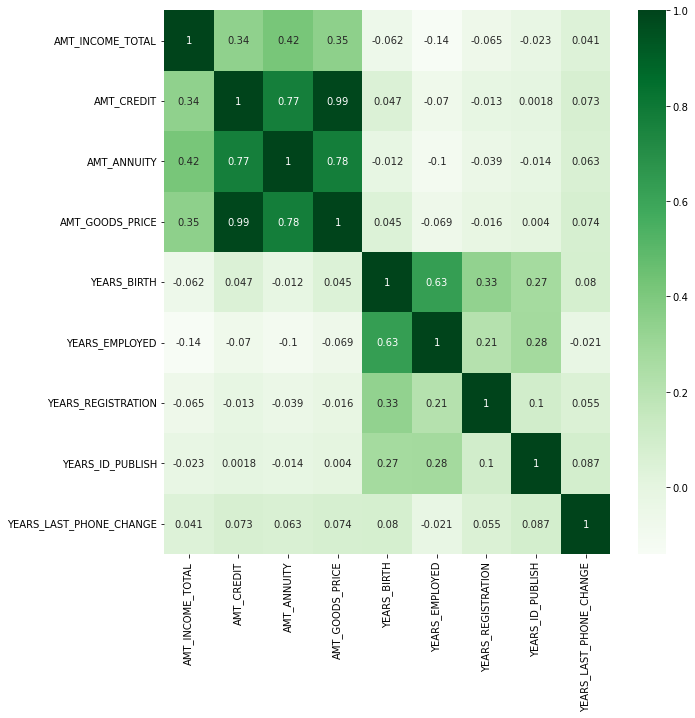

In [73]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data_0.corr(),annot=True,cmap="Greens")
plt.show()

#### Conclusion >> 

1. AMT_INCOME_TOTAL - It has a positive corelation index of 0.34,0.42,0.35 with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively and Negative with most of the other Year columns 
2. AMT_CREDIT - Is has a strong positive coreltaion index of 0.99,0.77 with AMT_GOODS_PRICE, AMT_ANNUITY respectively.
3. AMT_ANNUITY - Is has positive coreltaion index of 0.77,0.78 with AMT_CREDIT,AMT_GOODS_PRICE respectively and Negative with most of the other Year columns
4. AMT_GOODS_PRICE - It has a strong positive corelation index 0.78,0.99 with AMT_ANNUITY, AMT_CREDIT

#### Co-relation for Numerical columns for Target 1

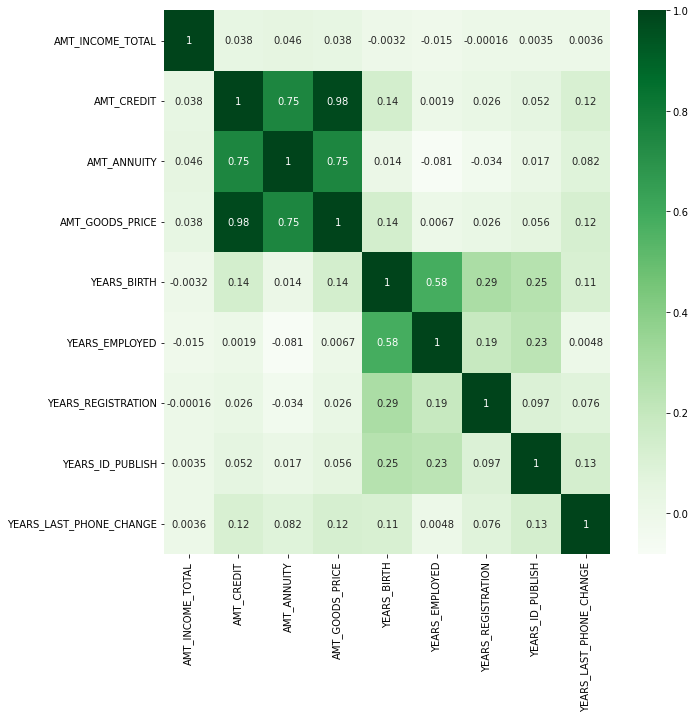

In [74]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_data_1.corr(),annot=True,cmap="Greens")
plt.show()

#### Conclusion >> 

1. AMT_INCOME_TOTAL - It is less correlated with AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE respectively
2. AMT_CREDIT - Is has a strong positive coreltaion index of 0.98,0.75 with AMT_GOODS_PRICE, AMT_ANNUITY respectively and also positive corelation with other Year Columns
3. AMT_ANNUITY - Is has positive coreltaion index of 0.75 with AMT_CREDIT,AMT_GOODS_PRICE and Negative with YEAR_EMPLOYED,YEAR_REGISTRATION
4. AMT_GOODS_PRICE - It has a strong positive corelation index 0.75,0.98 with AMT_ANNUITY, AMT_CREDIT and weak positive corelation with other Year columns

### Read Previous Application CSV

In [75]:
papp_data = pd.read_csv("previous_application.csv")
papp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Data Inspection on Previous Application dataset

#### Get info and shape on the dataset

In [76]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [77]:
papp_data.shape

(1670214, 37)

### Data quality Check

#### Check for Percentage null values in Application dataset

In [78]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Conclusion >> Columns with null values more than 49 percent may give wrong insights, hence dropping them 

#### Dropping Columns with missing values greater than 49

In [79]:
Percentage = 49
threshold = int(((100-Percentage)/100)*papp_data.shape[0] + 1)
papp_df = papp_data.dropna(axis=1, how='any', thresh=threshold)
papp_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Validate the dataset for dropped columns

In [80]:
papp_df.shape

(1670214, 32)

In [81]:
papp_df.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

### Impute Missing values

#### Check the dtype of missing values in Application dataset before imputing values

In [82]:
papp_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

#### Imputing the missing values

#### Convert Negative values to Positive in Days variables so that median is not affected

In [83]:
#papp_df.DAYS_FIRST_DRAWING = papp_df.DAYS_FIRST_DRAWING.apply(lambda x: abs(x))
#papp_df.DAYS_FIRST_DUE = papp_df.DAYS_FIRST_DUE.apply(lambda x: abs(x))
#papp_df.DAYS_LAST_DUE_1ST_VERSION = papp_df.DAYS_LAST_DUE_1ST_VERSION.apply(lambda x: abs(x))
#papp_df.DAYS_LAST_DUE = papp_df.DAYS_LAST_DUE.apply(lambda x: abs(x))
#papp_df.DAYS_TERMINATION = papp_df.DAYS_TERMINATION.apply(lambda x: abs(x))
#papp_df.DAYS_DECISION = papp_df.DAYS_DECISION.apply(lambda x: abs(x))

In [84]:
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x: abs(x))

#### Imputing Numerical Columns with media and categorical columns with mode

In [85]:
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col].fillna(papp_df[col].median(),inplace=True)
    else:
        papp_df[col].fillna(papp_df[col].mode()[0],inplace=True)

#### Validate if any null values present in dataset

In [86]:
null_Cols = list(papp_df.columns[papp_df.isna().any()])
len(null_Cols)

0

In [87]:
papp_df.isnull().mean()*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
DAYS_FIRST_DRAWING             0.0
DAYS_FIRST_DUE                 0.0
DAYS_LAST_DUE_1ST_VE

In [88]:
papp_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,1,XNA,24.0,high,Cash Street: high,365243.0,921.0,741.0,1155.0,1171.0,0.0


In [89]:
papp_df.shape

(1670214, 32)

### Binning of continuous variables

#### Binning AMT_CREDIT Column

In [90]:
papp_df.AMT_CREDIT.describe()

count    1.670214e+06
mean     1.961140e+05
std      3.185745e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [91]:
papp_df["AMT_CREDIT_Category"] = pd.cut(papp_df.AMT_CREDIT,[0,200000,400000,600000,800000,10000000],labels=["Very-low Credit","Low Credit","Medium Credit","High Credit","Very-high Credit"])

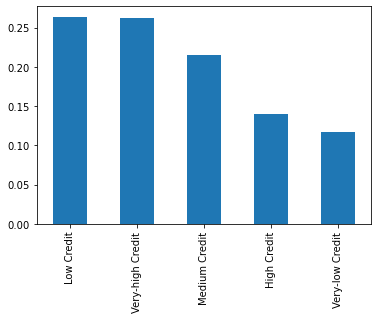

In [92]:
app_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

#### Conclusion >> The Credit amount of the loan for most applicants is either low(200000 to 400000) or Very High(above 800000)

#### Binning AMT_GOODS_PRICE Column

In [93]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.qcut(papp_df.AMT_GOODS_PRICE,q=[0,0.25,0.45,0.65,0.85,1],labels=["Very-low Price","Low Price","Medium Price","High Price","Very-high Price"])

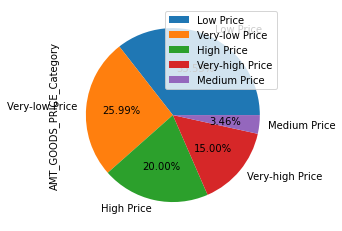

In [94]:
papp_df["AMT_GOODS_PRICE_Category"].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

#### Conclusion >> Most of the Applicants are have Low Goods Price

### Data Imbalance check

#### Dividing Application Dataset with NAME_CONTRACT_STATUS

In [95]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS == "Approved"]
cancelled = papp_df[papp_df.NAME_CONTRACT_STATUS == "Canceled"]
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Refused"]
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Unused offer"]

In [96]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

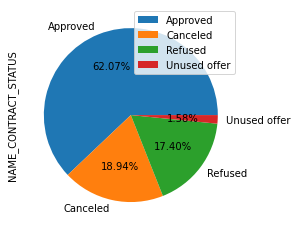

In [97]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.2f%%')
plt.legend()
plt.show()

#### Conclusion >> 62% of the Applicants have the loan approved, 19%, 17% applicants are rejected or canceled and 2% are unused

### Univarient Analysis

In [98]:
cat_cols = list(papp_df.columns[papp_df.dtypes== np.object])
num_cols = list(papp_df.columns[papp_df.dtypes== np.int64]) + list(papp_df.columns[papp_df.dtypes== np.float64])

In [99]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [100]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

#### Removing the Not required columns for better analysis

In [101]:
cat_cols = ["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE","NAME_SELLER_INDUSTRY","CHANNEL_TYPE","NAME_YIELD_GROUP","PRODUCT_COMBINATION"]

In [102]:
num_cols = ["HOUR_APPR_PROCESS_START","DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]

### Plot on Categorical columns

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64


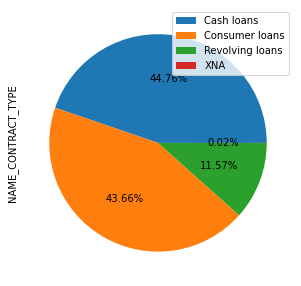

-----------------------
TUESDAY      15.274570
WEDNESDAY    15.268103
MONDAY       15.181109
FRIDAY       15.090761
THURSDAY     14.914197
SATURDAY     14.407196
SUNDAY        9.864065
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


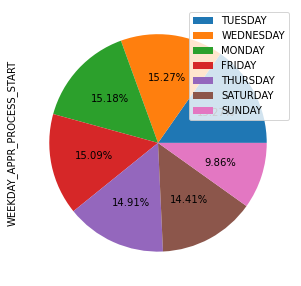

-----------------------
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64


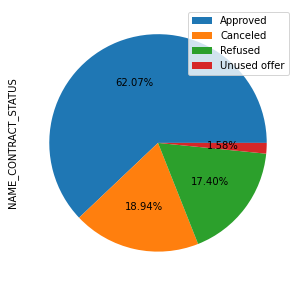

-----------------------
Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64


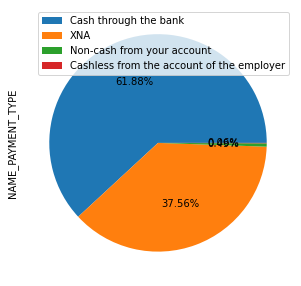

-----------------------
Repeater     73.718757
New          18.043376
Refreshed     8.121654
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64


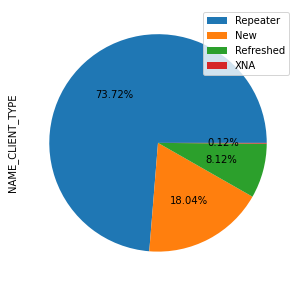

-----------------------
XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64


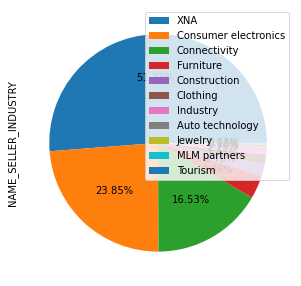

-----------------------
Credit and cash offices       43.106332
Country-wide                  29.618360
Stone                         12.697954
Regional / Local               6.497850
Contact center                 4.268734
AP+ (Cash loan)                3.415490
Channel of corporate sales     0.368216
Car dealer                     0.027062
Name: CHANNEL_TYPE, dtype: float64


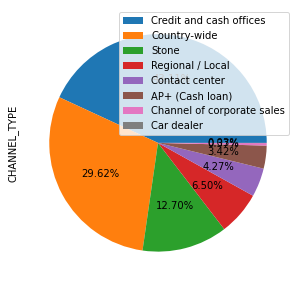

-----------------------
XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64


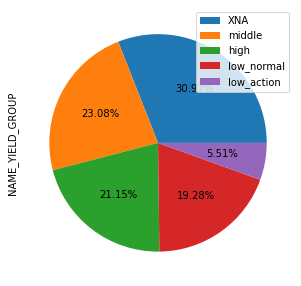

-----------------------
Cash                              17.143671
POS household with interest       15.783726
POS mobile with interest          13.212079
Cash X-Sell: middle                8.614645
Cash X-Sell: low                   7.798282
Card Street                        6.740573
POS industry with interest         5.917385
POS household without interest     4.963915
Card X-Sell                        4.824651
Cash Street: high                  3.570740
Cash X-Sell: high                  3.550503
Cash Street: middle                2.075063
Cash Street: low                   2.025728
POS mobile without interest        1.441851
POS other with interest            1.429697
POS industry without interest      0.754514
POS others without interest        0.152974
Name: PRODUCT_COMBINATION, dtype: float64


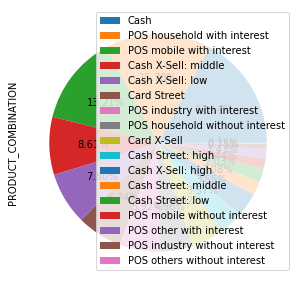

-----------------------


In [103]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[5,5])
    papp_df[col].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()
    print("-----------------------")

#### Conclusion >>

1. NAME_CONTRACT_TYPE - 45% Applicants received Cash loans,44% Applicants received Consumer loans,12% received Revolving during previous application
2. WEEKDAY_APPR_PROCESS_START - All the days have almost equal number of previous loan application
3. NAME_CONTRACT_STATUS - 62% of applications are approved, 19% Cancelled, 17% Refused and 2% unused
4. NAME_PAYMENT_TYPE - 62% of Payment type are Cash through bank, 32% Other modes
5. NAME_CLIENT_TYPE - 74% of Applicants are Repeaters, 18% are New applicants, 8% are Refreshed Appplicants
6. NAME_SELLER_INDUSTRY - 51% are from other Industries, 24%,17% are from Consumer electronics, Connectivity Industry respectively
7. CHANNEL_TYPE - 43% Channel type is Credit and cash offices, 29% are country wide
8. NAME_YIELD_GROUP - Majority of the yield group are others
9. PRODUCT_COMBINATION - Most used PRODUCT COMBINATION is Cash followed by POS household with interest, POS mobile with interest

### Plot on Numerical columns

99th Percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


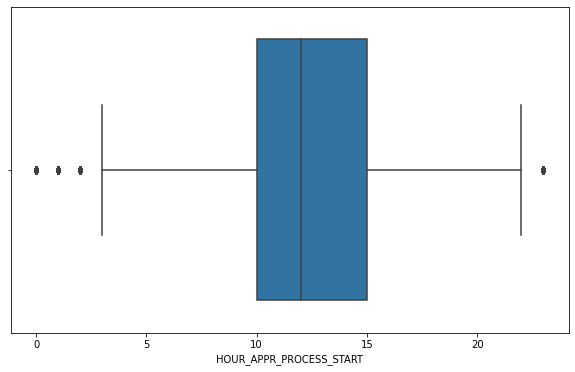

----------------------
99th Percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


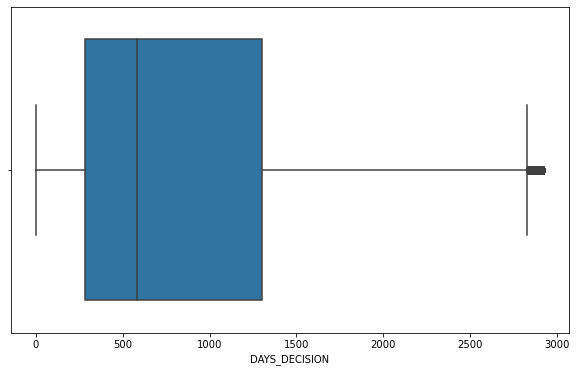

----------------------
99th Percentile 65758.5
count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


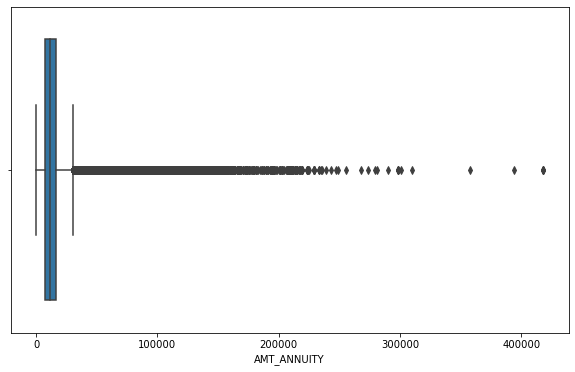

----------------------
99th Percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


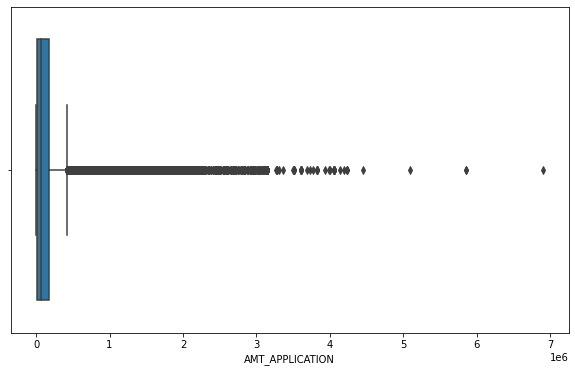

----------------------
99th Percentile 1515374.5499999619
count    1.670214e+06
mean     1.961140e+05
std      3.185745e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


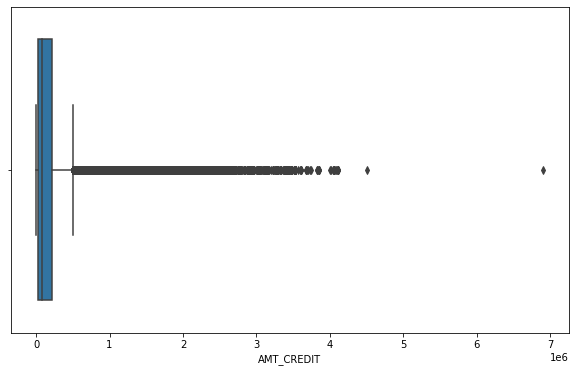

----------------------
99th Percentile 1350000.0
count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


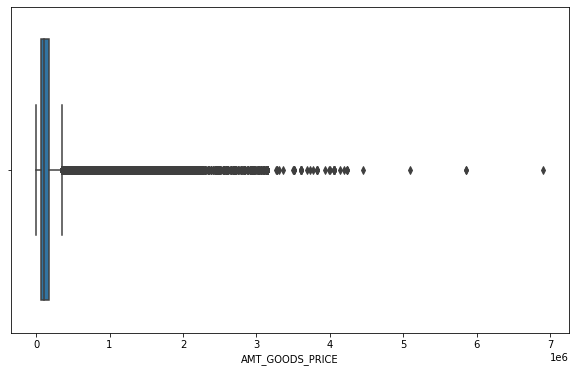

----------------------
99th Percentile 60.0
count    1.670214e+06
mean     1.515057e+01
std      1.295220e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.600000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


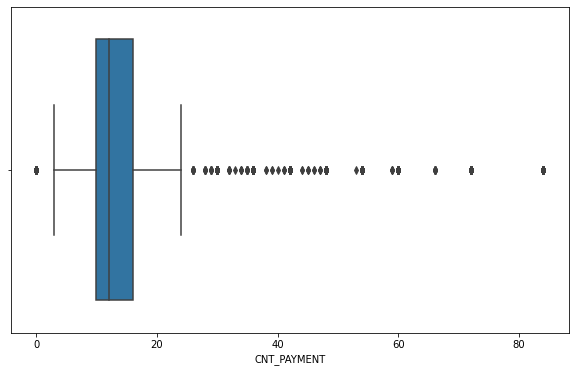

----------------------


In [104]:
for col in num_cols:
    print("99th Percentile",np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize=[10,6])
    sns.boxplot(data=papp_df,x=col)
    plt.show()
    print("----------------------")

#### Conclusion >> Few Columns are with outliers are below

1. HOUR_APPR_PROCESS_START has few outliers and there small difference between mean and median
2. AMT_CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
3. AMT_ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers
4. AMT_GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers
5. AMT_APPLICATION Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers
6. CNT_PAYMENT Column has few outliers and there small difference between mean and median
7. DAYS_DECISION has few outliers and there small difference between mean and median

### Bivarient & Multivarient Analysis

#### Bivarient Analysis between WEEKDAY_APPR_PROCESS_START VS AMT_APPLICATION

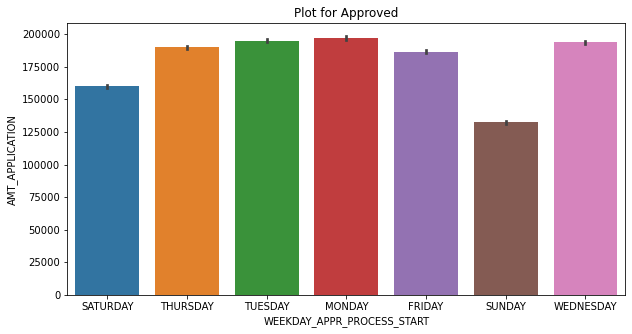

In [105]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=approved)
plt.title("Plot for Approved")
plt.show() 

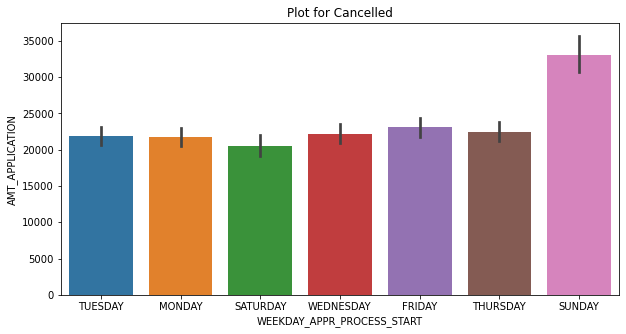

In [106]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=cancelled)
plt.title("Plot for Cancelled")
plt.show() 

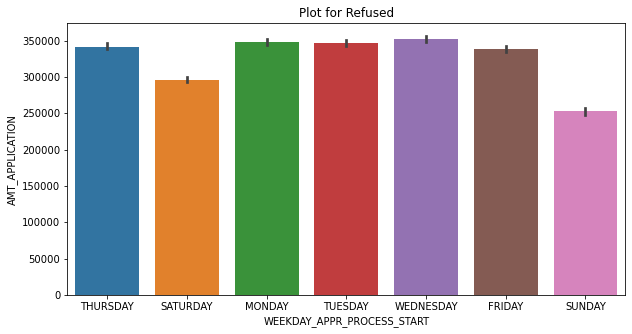

In [107]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=refused)
plt.title("Plot for Refused")
plt.show() 

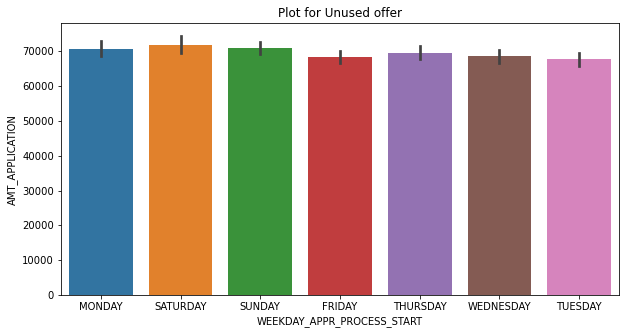

In [108]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=unused)
plt.title("Plot for Unused offer")
plt.show() 

#### Conclusion >> 

1. The Credit Amount of applicants with approved status is high on Monday and Wednesday than other days, and least on Sunday
2. The Credit Amount of applicants with cancelled status is high on Sunday and almost equal on other days
3. The Credit Amount of applicants with rejected status is least on Sunday and more on Monday and Wednesday
4. The Credit Amount of applicants with unused offer status is almost equal on all days

#### Bivarient Analysis between AMT_ANNUITY VS AMT_GOODS_PRICE

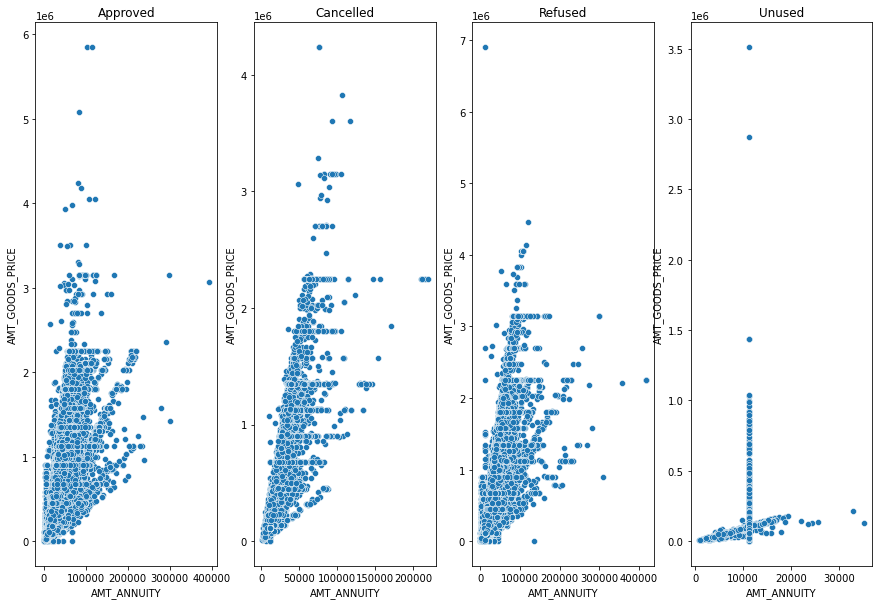

In [109]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=approved)
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=cancelled)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=refused)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=unused)
plt.show()

#### Conclusion >>

1. For loan status as Approved,Refused,Cancelled Amount of annuity increases with goods price
2. For loan status as Refused it has no linear relationship

### Co-relation between Numerical Columns

In [110]:
corr_approved = approved[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_refused = refused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_cancelled = cancelled[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]
corr_unused = unused[["DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]]

#### Co-relation for Numerical columns for Approved

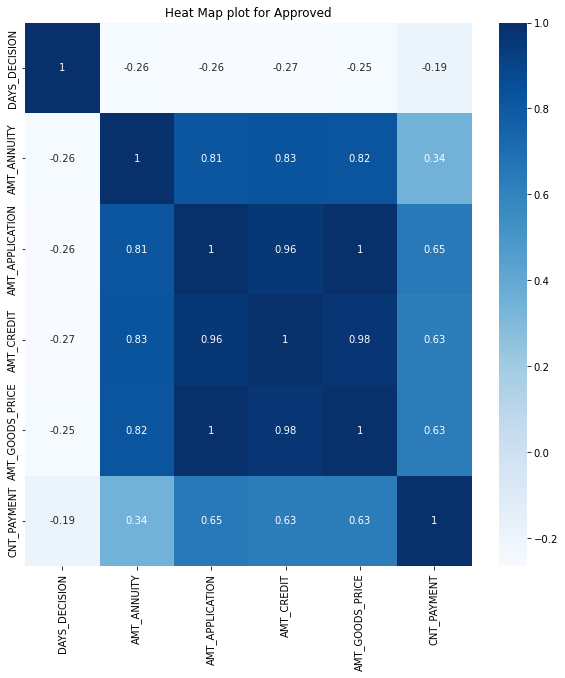

In [111]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_approved.corr(),annot=True,cmap="Blues")
plt.title("Heat Map plot for Approved")
plt.show()

#### Conclusion >> 

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE,AMT_ANNUITY
2. DAYS_DECISION has negative Corelation with AMT_GOODS_PRICE,AMT_CREDIT, AMT_APPLICATION,CNT_PAYMENT,AMT_ANNUITY

#### Co-relation for Numerical columns for Refused

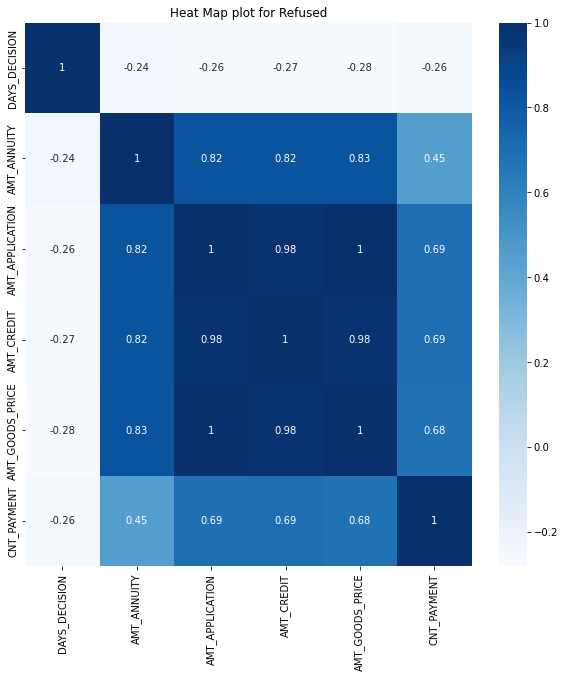

In [112]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_refused.corr(),annot=True,cmap="Blues")
plt.title("Heat Map plot for Refused")
plt.show()

#### Conclusion >> For Refused Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE,AMT_ANNUITY
2. DAYS_DECISION has negative Corelation with AMT_GOODS_PRICE,AMT_CREDIT, AMT_APPLICATION,CNT_PAYMENT,AMT_ANNUITY

#### Co-relation for Numerical columns for Cancelled

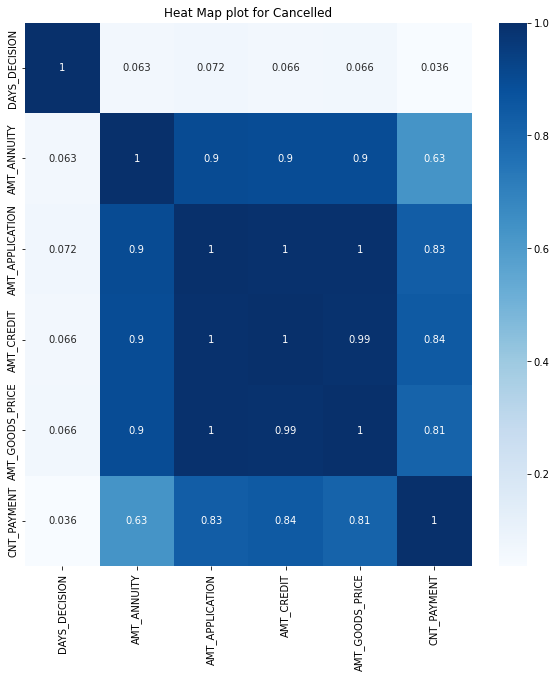

In [113]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_cancelled.corr(),annot=True,cmap="Blues")
plt.title("Heat Map plot for Cancelled")
plt.show()

#### Conclusion >> For Cancelled Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE
2. DAYS_DECISION has positive Corelation with AMT_GOODS_PRICE,AMT_CREDIT, AMT_APPLICATION

#### Co-relation for Numerical columns for Unused

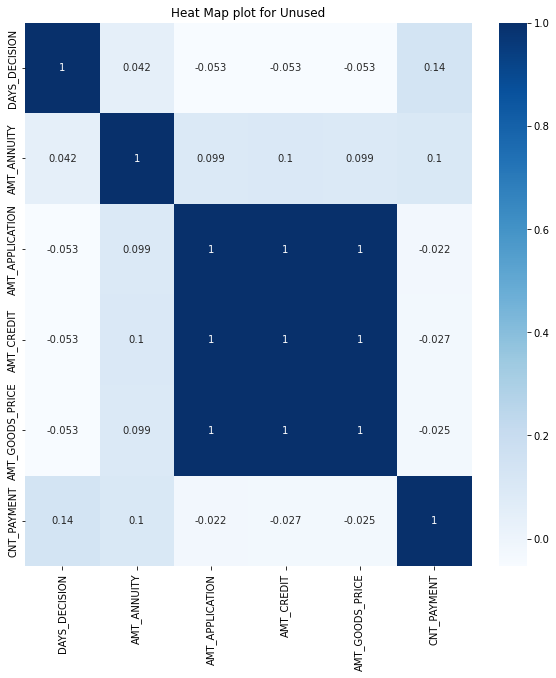

In [114]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_unused.corr(),annot=True,cmap="Blues")
plt.title("Heat Map plot for Unused")
plt.show()

#### Conclusion >> For Unused Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE
2. DAYS_DECISION has negative Corelation with AMT_GOODS_PRICE,AMT_CREDIT, AMT_APPLICATION

### Merge the Application and Previous Application Dataframes

In [115]:
merge_df = app_df.merge(papp_df,on=["SK_ID_CURR"],how='left')
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_Category_x,AGE_CATEGORY,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CREDIT_Category_y,AMT_GOODS_PRICE_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,9,5,3,Medium Credit,Below 25,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0,Very-low Credit,High Price
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3,0,2,Very-high Credit,25-45,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0,Very-high Credit,Very-high Price
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,3,0,2,Very-high Credit,25-45,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,

#### Get info on the Merged Dataframe

In [116]:
merge_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 113 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          object  
 3    CODE_GENDER                   object  
 4    FLAG_OWN_CAR                  object  
 5    FLAG_OWN_REALTY               object  
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE               object  
 12   NAME_INCOME_TYPE              object  
 13   NAME_EDUCATION_TYPE           object  
 14   NAME_FAMILY_STATUS            object  
 15   NAME_HOUSING_TYPE             object  
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

#### Filtering required columns for our Analysis

In [117]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col, axis=1, inplace=True)
print(merge_df.shape)

(1430155, 84)


In [118]:
res1 = pd.pivot_table(data=merge_df,index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"],columns=["NAME_CONTRACT_STATUS"],values='TARGET',aggfunc='mean')
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

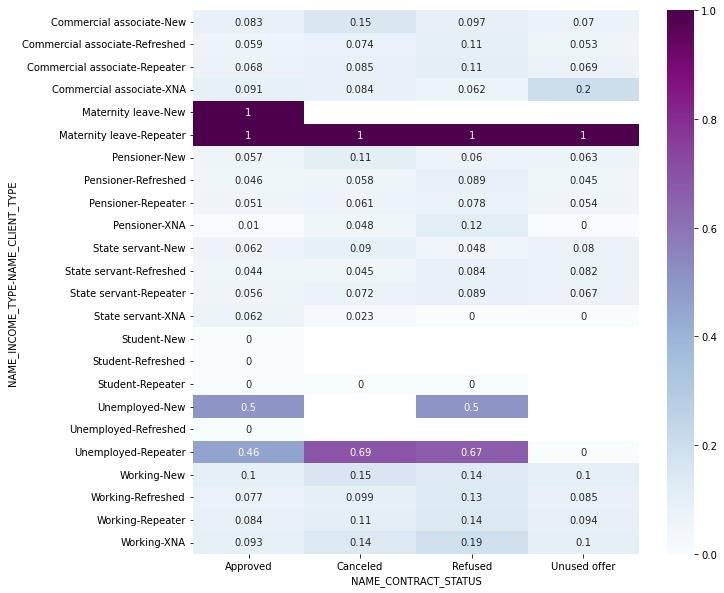

In [119]:
plt.figure(figsize=[10,10])
sns.heatmap(res1,annot=True,cmap='BuPu')
plt.show()

#### Conclusion >>

1. Applicants with income type Maternity leave and client type New are having more chances of getting the loan approved
2. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan cancelled
3. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan Refused
4. Applicants with income type Maternity leave and client type Repeater, Working and client type New are not able to utilizte the Bank's offer


In [120]:
res2 = pd.pivot_table(data=merge_df,index=["CODE_GENDER","NAME_SELLER_INDUSTRY"],columns=["TARGET"],values='AMT_GOODS_PRICE_x',aggfunc='sum')
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

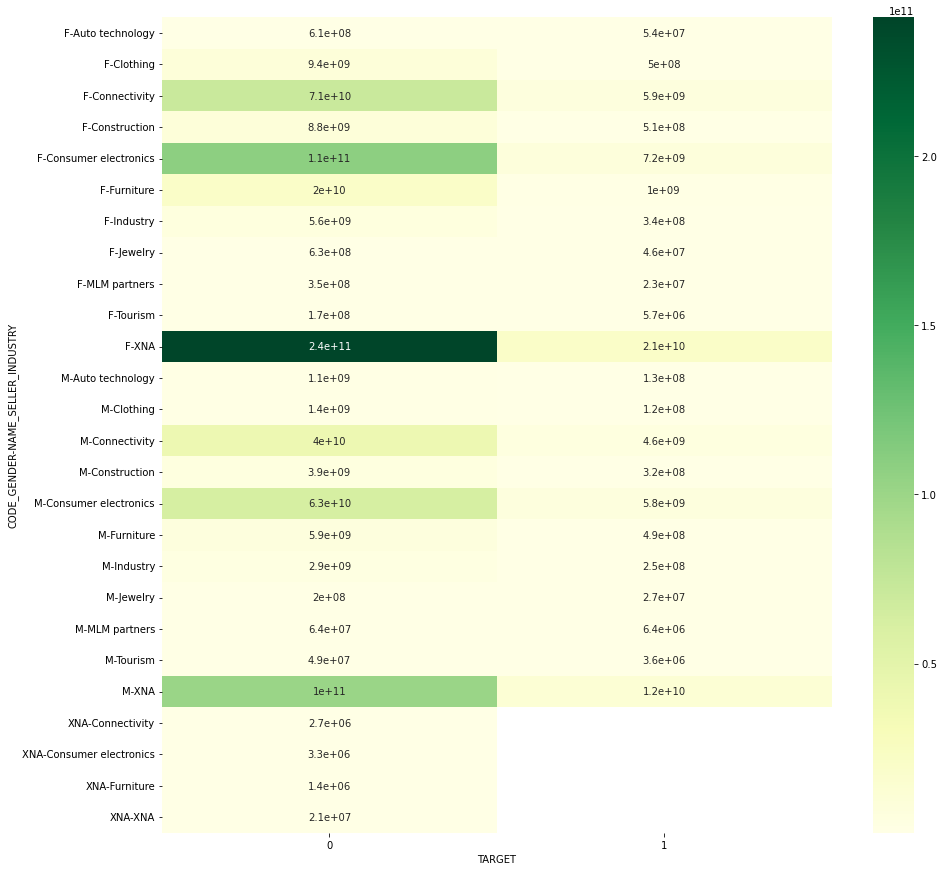

In [121]:
plt.figure(figsize=[15,15])
sns.heatmap(res2,annot=True,cmap='YlGn')
plt.show()

#### Conclusion

1. Female Applicants from Other Seller industry are more likely to repay the loan on time
2. Male Applicants from furniture industry are less likely to repay the loan on time